# Epidemiological Insights: Analyzing COVID-19 Trends Through Data Science




Kasey Nastahunina NetID: knasta3

Daniel Quirke NetID: dquirk2

Maxwell Olmen NetID: molme2

Divyal Desle NetID: ddesle2

Ananya Mate NetID: amate4


This data science project delves into the heart of the pandemic, leveraging advanced analytical techniques to extract epidemiological insights and trends from global COVID-19 data. The primary objective of this study is to employ data-driven methodologies to uncover patterns, variations, and key factors influencing the spread and impact of the virus. The project utilizes a diverse set of data science tools, including predictive modeling, machine learning algorithms, and geospatial analysis, to gain a nuanced understanding of the evolving landscape of the pandemic.

Through extensive data exploration and statistical analysis, we aim to identify critical factors contributing to the variation in COVID-19 transmission rates, hotspots, and severity. The project also addresses the temporal aspect of the pandemic, incorporating time-series analysis to forecast potential future trends and waves.

### Key objectives

1. Exploratory Data Analysis (EDA) - initial data exploration to understand the structure, patterns, and characteristics of the dataset.

2. Visualisations - summary statistics, visualizations, and plots to gain insights.

3. Data Preparation - transform features to create meaningful variables for analysis.

4. Hypothesis - Based on the data analysis of the problem, formulate one or more null hypothesis (H0) and an alternative hypothesis (H1)..

5. Machine Learning Analysis - Choose appropriate machine learning or statistical models based on the project's goal. Split the data into training, validation, and test sets for model development and evaluation. Train and fine-tune the models using appropriate techniques (e.g., cross-validation, hyperparameter tuning).

6. Evaluation and Validation - assess model performance using relevant metrics (e.g., accuracy, precision, recall, F1-score for classification; RMSE, MAE for regression).

7. Interpretation - interpret model results and provide meaningful insights. Create visualizations, reports, and dashboards to report findings.

8. Conclusion and Final Report - Summarize the findings, conclusions, and actionable recommendations. Present the project's achievements and potential next steps.



### Changes Made

Initially the idea of the project was Effectiveness of Non-Pharmaceutical Interventions to see how masks, social distancing, quarantining, ect helped prevent COVID-19 spread. However, with limited data available on Non-Pharmaceutical Interventions (NPIs) we have decided to shift their focus towards assessing the Effectiveness of COVID-19 vaccines. There is more variety of data that would be interesting to analyze. 

This project could help develop new hypotheses and strategies for controlling the spread of infectious diseases in the future. With a wider range of data available, we can understand various aspects of vaccination efforts. This could include studying the efficacy of different vaccine types, analyzing the impact of vaccination on different demographics, and evaluating the long-term effectiveness of booster shots.

Ultimately, the understaing COVID-19 is a critical aspect to combat the pandemic that has influenced numerous lives and is still affecting our society after multiple years. By deeply studying and analyzing this topic, we can contribute to the global understanding of controlling infectious diseases and get an understanding for more effective strategies in the future.


In [28]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import random

from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score

## Part 1: Data Preperation

There are three different data sets, the first two found on the World Health Organization (WHO) webpage. The first set is used to track the Covid-19 cases, deaths, etc, and the second set is developed information on Covid-19 and Vaccine different records. The third data set was made by the World Bank. It represents the population of countries from 1960 - 2016. The data set is used for analysis of total cases compared to their population.

Data referance: https://covid19.who.int/data

Here is how all data sets look like:

In [7]:
covidData = pd.read_csv("WHO-COVID-19-global-data.csv")
covidData.tail(5)
#Kasey

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
331795,2023-10-29,ZW,Zimbabwe,AFRO,0,265821,0,5720
331796,2023-10-30,ZW,Zimbabwe,AFRO,0,265821,0,5720
331797,2023-10-31,ZW,Zimbabwe,AFRO,0,265821,0,5720
331798,2023-11-01,ZW,Zimbabwe,AFRO,0,265821,0,5720
331799,2023-11-02,ZW,Zimbabwe,AFRO,0,265821,0,5720


In [8]:
covidData.describe()#Kasey

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,3.318000e+05,3.318000e+05,331800.000000,3.318000e+05
mean,2.325737e+03,1.518453e+06,21.027797,1.834586e+04
std,3.870292e+04,6.883106e+06,147.262467,7.655302e+04
min,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,0.000000e+00,2.664750e+03,0.000000,2.100000e+01
50%,0.000000e+00,3.750300e+04,0.000000,4.090000e+02
75%,1.460000e+02,4.399002e+05,1.000000,5.874250e+03
max,6.966046e+06,1.034368e+08,11447.000000,1.138309e+06


In [9]:
vaccineData = pd.read_csv("vaccination-data.csv")
vaccineData.tail(5)
#Kasey

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
224,"Saint Helena, Ascension and Tristan da Cunha",SHN,AFRO,OWID,2021-05-05,7892.0,4361,129.995,71.833,3531,58.162,NaN,NaN,1.0,NaN,NaN
225,Saint Lucia,LCA,AMRO,REPORTING,2023-06-02,122977.0,60140,66.971,32.751,54971,29.936,NaN,2021-02-17,5.0,7866.0,4.284
226,Serbia,SRB,EURO,REPORTING,2023-03-05,6722671.0,3398116,97.100,46.570,3324555,45.562,NaN,2020-12-23,5.0,0.0,0.000
227,Sweden,SWE,EURO,REPORTING,2023-10-01,23237123.0,7473037,225.000,71.496,7334822,70.174,NaN,2020-12-23,5.0,5542831.0,53.030
228,Tuvalu,TUV,WPRO,REPORTING,2023-02-01,26783.0,9763,227.129,82.793,9505,80.605,NaN,2021-04-13,1.0,5745.0,48.719


In [10]:
vaccineData.describe()
#Kasey

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
count,2.280000e+02,2.290000e+02,224.000000,229.000000,2.290000e+02,229.000000,0.0,225.000000,2.130000e+02,213.000000
mean,5.936173e+07,2.444442e+07,157.525549,64.021520,2.252511e+07,59.055817,NaN,5.004444,1.167633e+07,32.384286
std,2.839923e+08,1.138834e+08,84.384285,25.279778,1.084298e+08,25.316711,NaN,2.925409,6.096485e+07,25.255548
min,1.170000e+02,0.000000e+00,0.348000,0.000000,0.000000e+00,0.000000,NaN,1.000000,0.000000e+00,0.000000
25%,4.736552e+05,1.923710e+05,87.040000,45.654000,1.848010e+05,39.850000,NaN,3.000000,4.599500e+04,8.574000
50%,4.749752e+06,2.740227e+06,161.055500,68.860000,2.484985e+06,63.703000,NaN,5.000000,6.465040e+05,30.681000
75%,2.336545e+07,1.088471e+07,223.542500,82.616000,9.574047e+06,78.354000,NaN,7.000000,4.474108e+06,53.030000
max,3.516881e+09,1.318027e+09,469.778000,163.185000,1.284480e+09,163.185000,NaN,12.000000,8.340601e+08,145.944000


## Part 2: Exploratory data analysis

#### Covid Data:

The data for COVID-19 prepared by World Health Organization (WHO) has 7 columns and 331799 rows. The first column is Date_reported which states the day of the next data. The date is presented in different from US used format: year-month-day. The second column is Country_code which is the country's name abbreviation. We will not be using it in the project. The next column is Country which is just the country's name followed by WHO_region. This column states the continent where the country is located. The information might be used for demographic comparison. The last 4 columns are the one we going to be using the most. It is new cases and death of the stated day and total cases and death as of stated day. The information is going to be used for analysis and ML computation.

#### Vaccine Data:

The Vaccine Data was also prepared by the World Health Organization (WHO) has 10 columns and 228 rows. There are many columns that we are not going to be using. However, there is helpful information like: country's name, total vaccination at stated date (2 separate rows), number of people vaccinated with one, two or more doses of vaccine.

## Part 3: Visualizations

3 Comparisons:

1. Start of Covid-19 (March - April - May 2020, US) no vaccinations. Comparison of death and total cases.
2. Peak of Covid-19 (December - January - February 2020-2021, US) vaccination started December of 2020. Comparison of death and total cases and vaccination.
3. Recent dates (July - August - September 2022, US), majority is vaccinated with all doses. Comparison of death and total cases and vaccination.
4. Overall raise of death from covid and vaccinations

Build Hypothesis based on the visualizations.


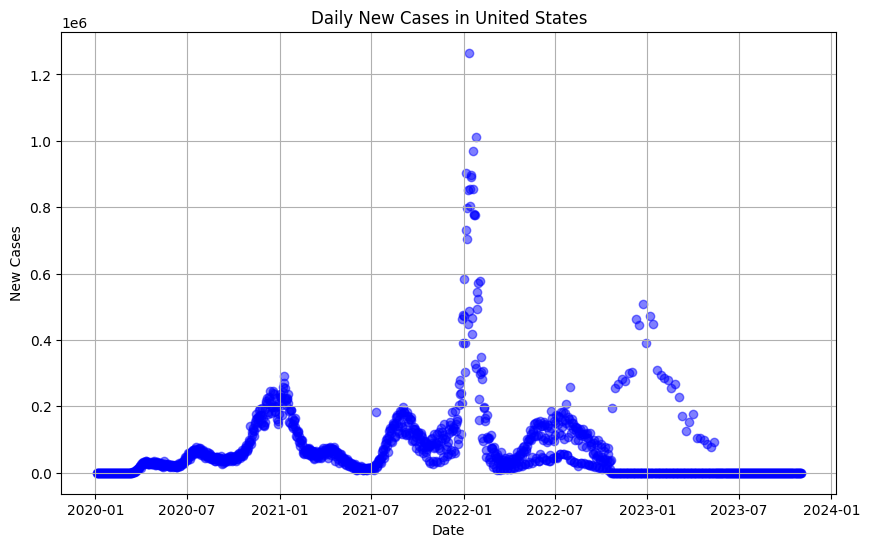

In [11]:
covidData['Date_reported'] = pd.to_datetime(covidData['Date_reported'])

us_data = covidData[covidData['Country'] == 'United States of America'].copy()

plt.figure(figsize=(10, 6))
plt.scatter(us_data['Date_reported'], us_data['New_cases'], color='blue', marker='o', alpha=0.5)
plt.title('Daily New Cases in United States')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.show()
#Kasey

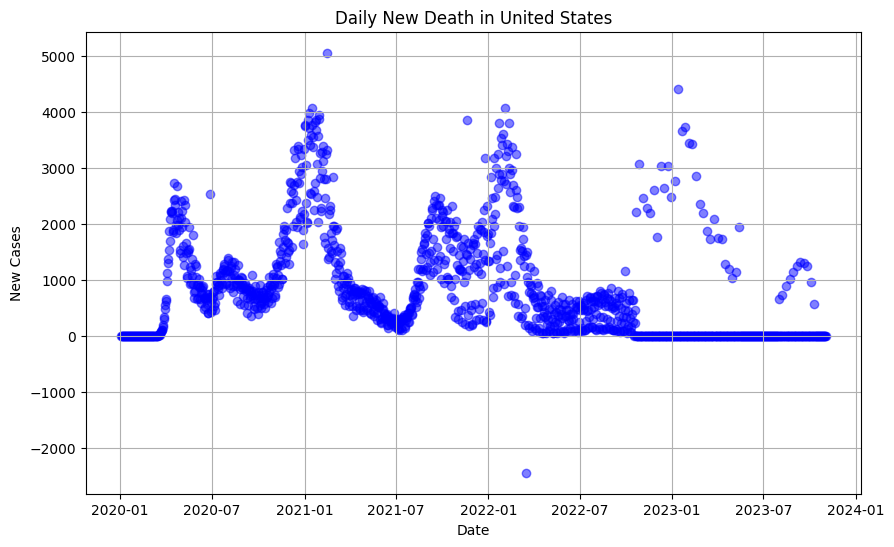

In [12]:
covidData['Date_reported'] = pd.to_datetime(covidData['Date_reported'])

us_data = covidData[covidData['Country'] == 'United States of America'].copy()

plt.figure(figsize=(10, 6))
plt.scatter(us_data['Date_reported'], us_data['New_deaths'], color='blue', marker='o', alpha=0.5)
plt.title('Daily New Death in United States')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.show()
#Kasey

### Comments on the Daily New Cases and Daily New Death: 

Interestingly, the Covid-19 cases and death cases were quite inconsistent during the first 2-3 years. We would assume it to be more linear. Now it is getting closer to 0. There was a high point in the daily new cases that we assumed to be an outlier. However, the information is correct and was a day when total daily cases were 1.35 million! While data for daily new cases seems correct, there is an outlier in the death cases that shows a negative value.

So let's take a closer look at what Covid-19 cases looked like before, during and year after vaccine.

In [15]:
numeric_covid_data = covidData.select_dtypes(include=['number'])
correlation_matrix = numeric_covid_data.corr()
print(correlation_matrix)
#Kasey

                   New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
New_cases           1.000000          0.175427    0.317665           0.131933
Cumulative_cases    0.175427          1.000000    0.241994           0.810028
New_deaths          0.317665          0.241994    1.000000           0.335731
Cumulative_deaths   0.131933          0.810028    0.335731           1.000000


### Comments on Corelation Matrix

While most of the number on the corelation matrix are not significant, there is a strong positive correlation (0.810028) between the cumulative number of cases and the cumulative number of deaths. The strong positive correlation between cumulative cases and cumulative deaths suggests that as the number of cases increases, the number of deaths tends to increase as well. Similarly, the moderate positive correlation between new cases and new deaths indicates a tendency for these two variables to increase together.

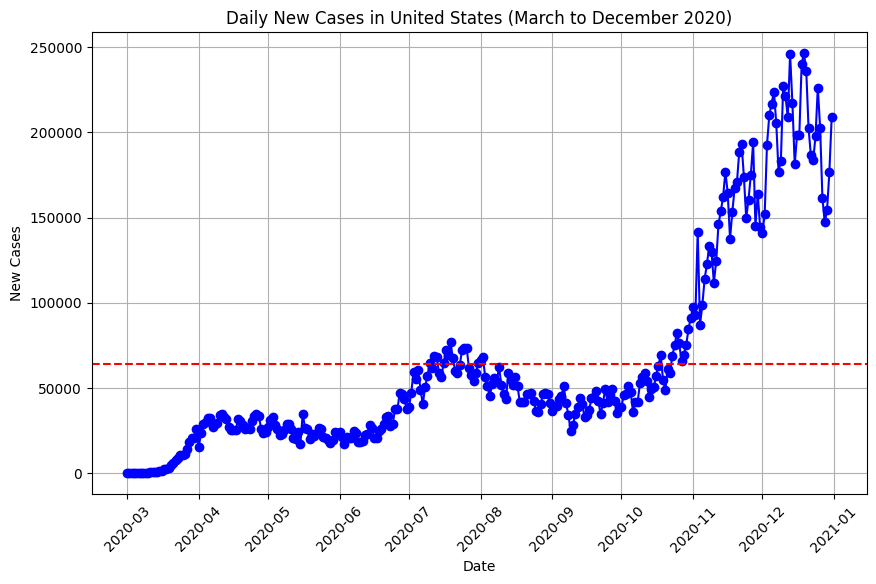

In [16]:
covidData['Date_reported'] = pd.to_datetime(covidData['Date_reported'])

us_data = covidData[covidData['Country'] == 'United States of America'].copy()

start_date = '2020-03-01'
end_date = '2020-12-31'
us_data = us_data[(us_data['Date_reported'] >= start_date) & (us_data['Date_reported'] <= end_date)]

us_data['Daily_new_cases'] = us_data['New_cases']
average_new_cases = us_data['Daily_new_cases'].mean()

plt.figure(figsize=(10, 6))
plt.plot(us_data['Date_reported'], us_data['Daily_new_cases'], color='blue', marker='o', linestyle='-')
plt.axhline(y=average_new_cases, color='red', linestyle='--', label='Average')
plt.title('Daily New Cases in United States (March to December 2020)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
#Kasey

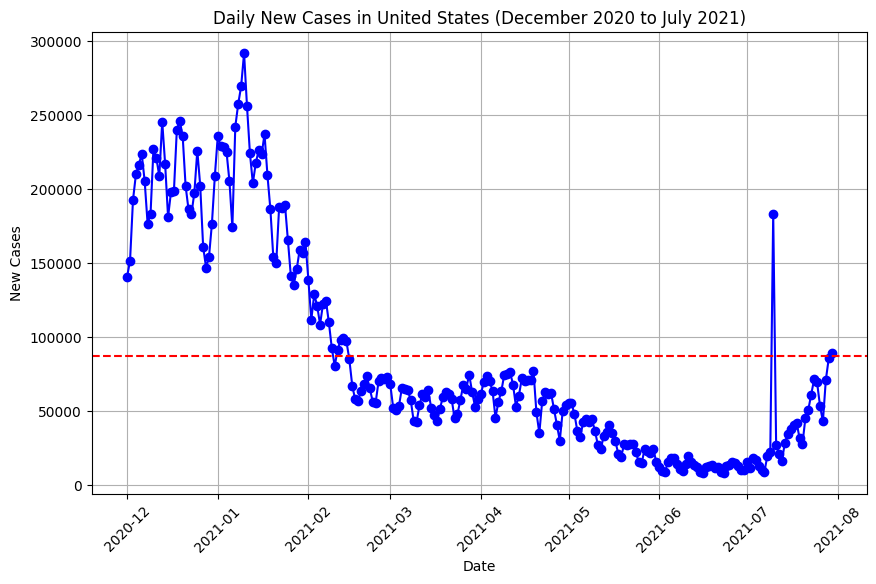

In [17]:
covidData['Date_reported'] = pd.to_datetime(covidData['Date_reported'])

us_data = covidData[covidData['Country'] == 'United States of America'].copy()

start_date = '2020-12-01'
end_date = '2021-07-30'
us_data = us_data[(us_data['Date_reported'] >= start_date) & (us_data['Date_reported'] <= end_date)]

us_data['Daily_new_cases'] = us_data['New_cases']
average_new_cases = us_data['Daily_new_cases'].mean()

plt.figure(figsize=(10, 6))
plt.plot(us_data['Date_reported'], us_data['Daily_new_cases'], color='blue', marker='o', linestyle='-')
plt.axhline(y=average_new_cases, color='red', linestyle='--', label='Average')
plt.title('Daily New Cases in United States (December 2020 to July 2021)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
#Kasey

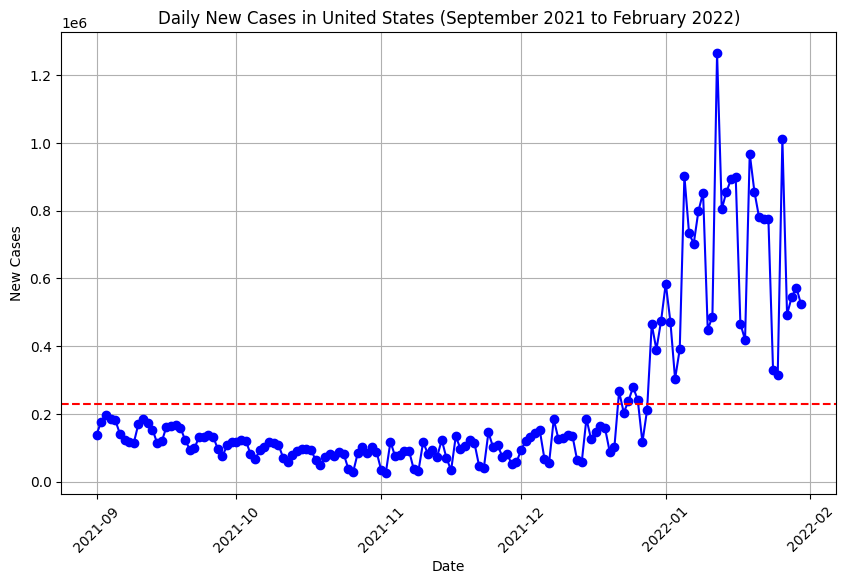

In [18]:
covidData['Date_reported'] = pd.to_datetime(covidData['Date_reported'])

# Filter for United States and create a copy
us_data = covidData[covidData['Country'] == 'United States of America'].copy()

# Filter data for March and April 2020
start_date = '2021-09-01'
end_date = '2022-01-30'
us_data = us_data[(us_data['Date_reported'] >= start_date) & (us_data['Date_reported'] <= end_date)]

# Calculate daily new cases
us_data['Daily_new_cases'] = us_data['New_cases']
average_new_cases = us_data['Daily_new_cases'].mean()

# Creating the line plot
plt.figure(figsize=(10, 6))
plt.plot(us_data['Date_reported'], us_data['Daily_new_cases'], color='blue', marker='o', linestyle='-')
plt.axhline(y=average_new_cases, color='red', linestyle='--', label='Average')
plt.title('Daily New Cases in United States (September 2021 to February 2022)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
#Kasey

<Figure size 1200x600 with 0 Axes>

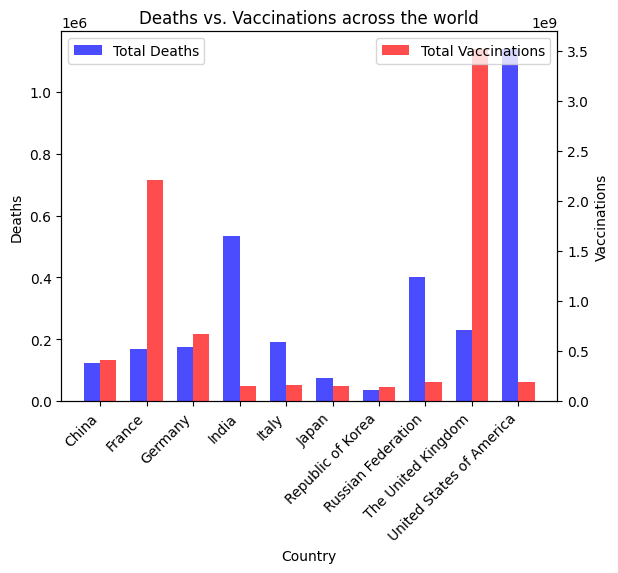

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming covidData and vaccineData are your DataFrames

# Convert 'Date_reported' to datetime
covidData['Date_reported'] = pd.to_datetime(covidData['Date_reported'])

# Filter data for a specific date and cumulative cases condition
us_data = covidData[(covidData['Date_reported'] == '2023-11-02')
                    & (covidData['Cumulative_cases'] > 20000000)].copy().tail(10)

# Filter vaccine data for countries in us_data
us_vaccine_data = vaccineData[vaccineData['COUNTRY'].isin(us_data['Country'])].copy()

# Create a figure and axis
plt.figure(figsize=(12, 6))
fig, ax1 = plt.subplots()

# Set the width of the bars
bar_width = 0.35

# Convert 'Country' to numerical indices
countries_numeric = np.arange(len(us_data['Country']))

# Plot bar for total deaths
ax1.bar(countries_numeric - bar_width/2, us_data['Cumulative_deaths'], width=bar_width, color='blue', alpha=0.7, label='Total Deaths')
ax1.set_xticks(countries_numeric)
ax1.set_xticklabels(us_data['Country'], rotation=45, ha='right')  # Rotate labels
ax1.set_xlabel('Country')
ax1.set_ylabel('Deaths')
ax1.legend(loc='upper left')

# Create a second y-axis for total vaccinations
ax2 = ax1.twinx()
ax2.bar(countries_numeric + bar_width/2, us_vaccine_data['TOTAL_VACCINATIONS'], width=bar_width, color='red', alpha=0.7, label='Total Vaccinations')
ax2.set_ylabel('Vaccinations')
ax2.legend(loc='upper right')

# Set title
plt.title('Deaths vs. Vaccinations across the world')

# Show the plot
plt.show()

#Maxwell

### Comments on the cases month by month: 


In the first year of covid before any vaccine became public the cases were very consistently going upwards. In December of 2020 the vaccination started spreading to pharmacies of the United States and the Covid-19 cases seemingly went down. Nevertheless, exactly one year (December 2021) after the vaccine came out the new cases per day raised again. So does that mean that the vaccination is not useful? Do we need to get a dose every 6 months?

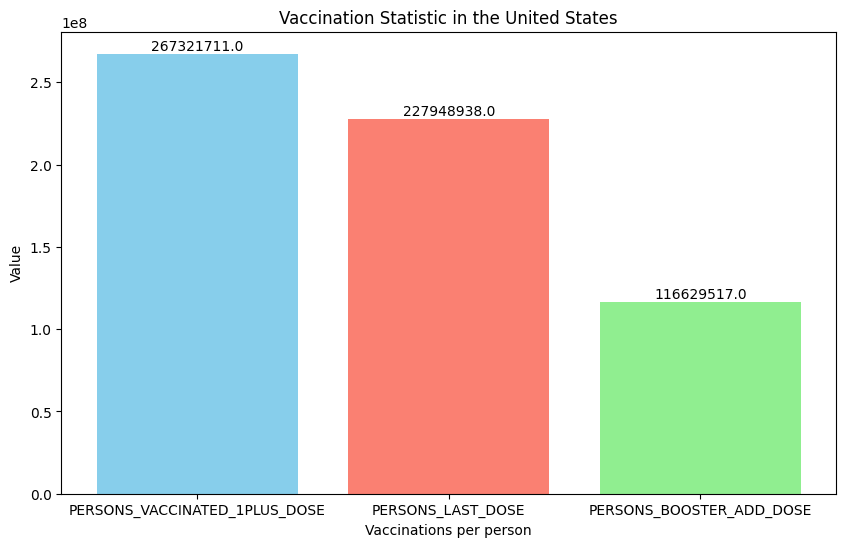

In [20]:
df_us = vaccineData[vaccineData['COUNTRY'] == 'United States of America']
columns_of_interest = ['PERSONS_VACCINATED_1PLUS_DOSE', 'PERSONS_LAST_DOSE', 'PERSONS_BOOSTER_ADD_DOSE']

df_selected = df_us[columns_of_interest]
values = df_selected.iloc[0].values
plt.figure(figsize=(10, 6))
bars = plt.bar(columns_of_interest, values, color=['skyblue', 'salmon', 'lightgreen'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

plt.title('Vaccination Statistic in the United States')
plt.xlabel('Vaccinations per person')
plt.ylabel('Value')

plt.show()
#Kasey

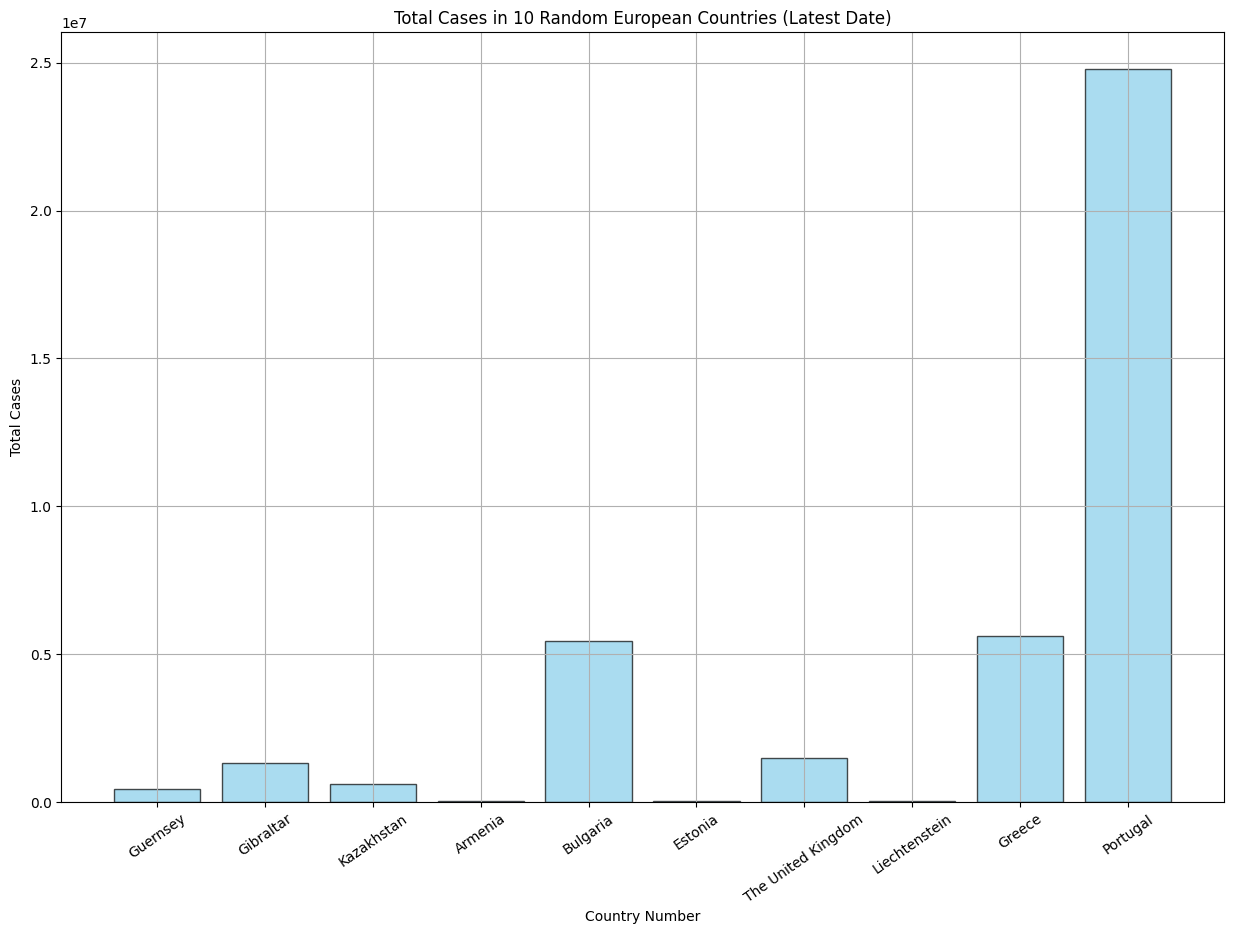

In [32]:
european_data = covidData[covidData['WHO_region'] == 'EURO']
latest_date_row = european_data[european_data['Date_reported'] == european_data['Date_reported'].max()]
random_countries = random.sample(list(latest_date_row['Country']), 10)
total_cases = latest_date_row[latest_date_row['Country'].isin(random_countries)]['Cumulative_cases']
country_numbers = list(range(1, 11))

plt.figure(figsize=(15, 10))
plt.bar(country_numbers, total_cases, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Total Cases in 10 Random European Countries (Latest Date)')
plt.xlabel('Country Number')
plt.ylabel('Total Cases')
plt.xticks(country_numbers, random_countries, rotation=35)
plt.grid(True)
plt.show()
#Kasey

### Hypothesis

Let's perform Hypothesis testing. Null hypothesis is: The cumulative cases in the United States are not significantly fewer than in Canada. 

○ dropna() is used to remove any missing values in the selected column.

○ ttest_ind function is used to perform an independent two-sample t-test.

In [22]:
us_data = covidData[covidData['Country'] == 'United States of America']['Cumulative_cases'].dropna()
canada_data = covidData[covidData['Country'] == 'Canada']['Cumulative_cases'].dropna()

t_value, p_value = ttest_ind(us_data, canada_data, alternative='less', equal_var=False)

significance_level = 0.05
print(f'Test Statistic (t): {t_value}')
print(f'P-value: {p_value / 2}')

if p_value/2 < significance_level:
    print('Reject the null hypothesis. The United States has significantly fewer cumulative cases than Canada.')
else:
    print('Null hypothesis is not rejected. Number of cumulative cases is greated in the United States')
#Kasey

Test Statistic (t): 50.29357979865509
P-value: 0.5
Null hypothesis is not rejected. Number of cumulative cases is greated in the United States.


## Part 4: Machine Learning Analysis

### Binary Classification Analysis
Binary classification analysis using logistic regression to predict whether the number of new COVID-19 cases in the United States is high or low based on the cumulative cases and cumulative deaths.

By creating a binary target variable, High_New_Cases, we can indicate whether the number of new cases in the United States is above the specified threshold (10,000 in this case). We then use logistic regression to build a classification model. The code evaluates the accuracy of the model and displays a classification report.

In [29]:
us_data = covidData[covidData['Country'] == 'United States of America'].copy()
threshold = 10000
us_data.loc[:, 'High_New_Cases'] = us_data['New_cases'] > threshold

X = us_data[['Cumulative_cases', 'Cumulative_deaths']]
y = us_data['High_New_Cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
#Kasey

Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.90      0.84        80
        True       0.96      0.91      0.93       200

    accuracy                           0.90       280
   macro avg       0.87      0.90      0.89       280
weighted avg       0.91      0.90      0.91       280



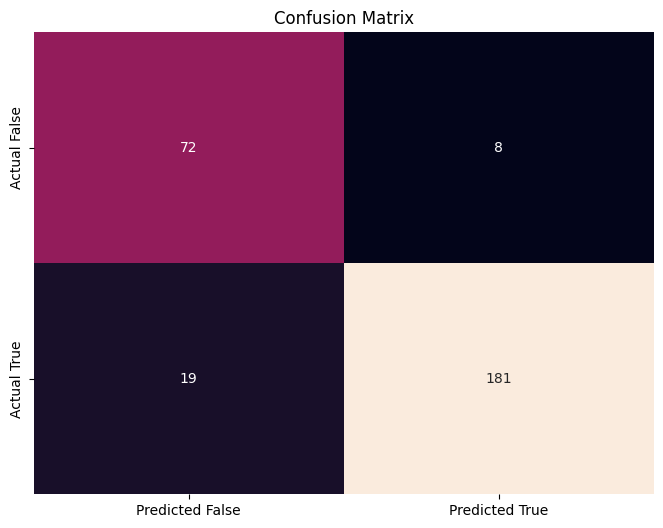

In [30]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cbar=False,
            xticklabels=['Predicted False', 'Predicted True'],
            yticklabels=['Actual False', 'Actual True'])
plt.title('Confusion Matrix')
plt.show()
#Kasey

### Analysis of Confusion Matrix:
A confusion matrix is a table that is often used to evaluate the performance of a classification algorithm. It is particularly useful for understanding the behavior of a model with respect to different classes. The confusion matrix has four entries:

True Positives (181): These are the cases where the model correctly predicted the positive class.

True Negatives (72): These are the cases where the model correctly predicted the negative class.

False Positives (8): These are the cases where the model predicted the positive class, but the true class was negative (Type I error).

False Negatives (19): These are the cases where the model predicted the negative class, but the true class was positive (Type II error).
#### How can Confusion Matrix help?
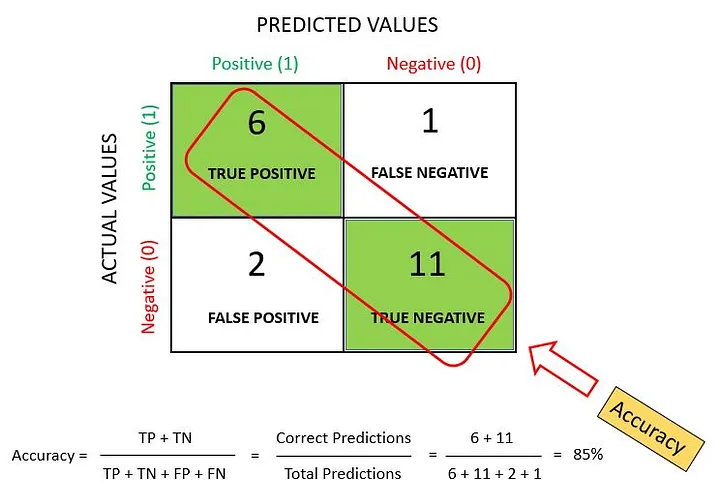
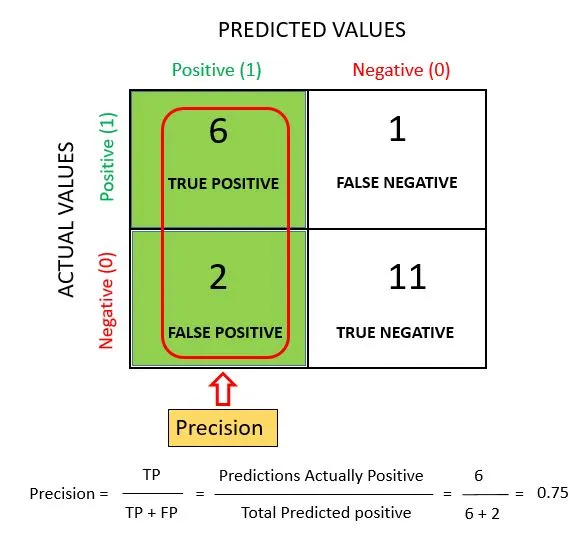
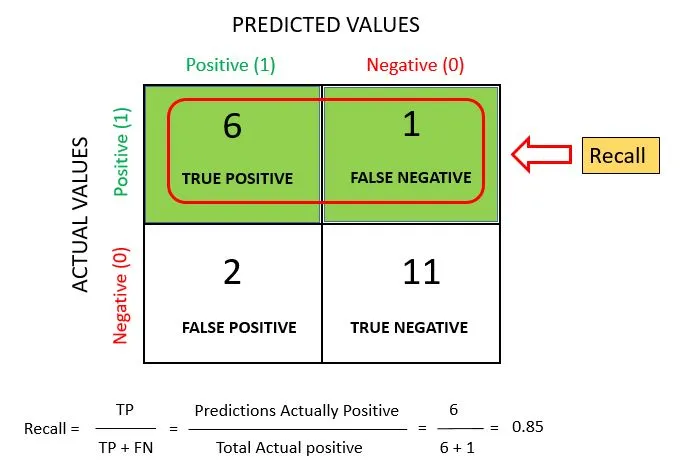

Reference: https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5

## Analysis of Binary Classification Analysis (Kasey)
The accuracy of the model is 90%, which means that it correctly predicted the class (high or low new cases) for 90% of the samples in the test set.

Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of the accuracy of the positive predictions:<br>
$\;\;\;\;\;\;$Precision for 'False' (low new cases): 0.79 (79%)<br>
$\;\;\;\;\;\;$Precision for 'True' (high new cases): 0.96 (96%)
    
Recall is the ratio of correctly predicted positive observations to the total actual positives. It is a measure of how well the model captures all the relevant cases:<br>
$\;\;\;\;\;\;$Recall for 'False' (low new cases): 0.90 (90%)<br>
$\;\;\;\;\;\;$Recall for 'True' (high new cases): 0.91 (91%)
    
The F1-score is the weighted average of precision and recall. It balances precision and recall into a single metric:<br>
$\;\;\;\;\;\;$F1-score for 'False' (low new cases): 0.84 (84%)<br>
$\;\;\;\;\;\;$F1-score for 'True' (high new cases): 0.93 (93%)
    
The number of actual occurrences of the class in the specified dataset:<br>
$\;\;\;\;\;\;$Support for 'False' (low new cases): 80<br>
$\;\;\;\;\;\;$Support for 'True' (high new cases): 200
    
The macro-average calculates the average performance across all classes, giving each class equal weight.<br>
$\;\;\;\;\;\;$Exmaple: Macro Avg Precision: (0.79 + 0.96) / 2 = 0.875
    
The weighted average calculates the average performance across all classes, giving each class a weight proportional to its support.<br>
$\;\;\;\;\;\;$Exmaple: Weighted Avg Precision: (0.79 * 80 + 0.96 * 200) / (80 + 200) = 0.91<br>
### Conclusion:

The logistic regression model appears to be effective in predicting whether the number of new COVID-19 cases in the United States is high or low based on the provided features.

# Decision Tree and Random Forest Model

Decision trees and random forests can be used for classification tasks, are interpretable, and random forests can capture complex relationships in the data by combining multiple decision trees, which can help us draw more detailed and accurate conclusions.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

us_data = covidData[covidData['Country'] == 'United States of America'].copy()

threshold = 10000
us_data.loc[:, 'High_New_Cases'] = us_data['New_cases'] > threshold

X = us_data[['Cumulative_cases', 'Cumulative_deaths']]
y = us_data['High_New_Cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Results:')
print(f'Accuracy: {accuracy_dt:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_dt))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('\nRandom Forest Results:')
print(f'Accuracy: {accuracy_rf:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_rf))

#Dan

Decision Tree Results:
Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.99      0.91        80
        True       0.99      0.93      0.96       200

    accuracy                           0.95       280
   macro avg       0.92      0.96      0.94       280
weighted avg       0.95      0.95      0.95       280


Random Forest Results:
Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.99      0.91        80
        True       0.99      0.93      0.96       200

    accuracy                           0.95       280
   macro avg       0.92      0.96      0.94       280
weighted avg       0.95      0.95      0.95       280



# Linear Regression Model

To perform an analysis on the COVID-19 dataset, we load the data, perform basic exploration, visualize trends in new cases and new deaths over time, and demonstrate an example of a linear regression model predicting new cases based on the date reported.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331800 entries, 0 to 331799
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      331800 non-null  datetime64[ns]
 1   Country_code       330400 non-null  object        
 2   Country            331800 non-null  object        
 3   WHO_region         331800 non-null  object        
 4   New_cases          331800 non-null  int64         
 5   Cumulative_cases   331800 non-null  int64         
 6   New_deaths         331800 non-null  int64         
 7   Cumulative_deaths  331800 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 20.3+ MB
None
          New_cases  Cumulative_cases     New_deaths  Cumulative_deaths
count  3.318000e+05      3.318000e+05  331800.000000       3.318000e+05
mean   2.325737e+03      1.518453e+06      21.027797       1.834586e+04
std    3.870292e+04      6.883106e+06  

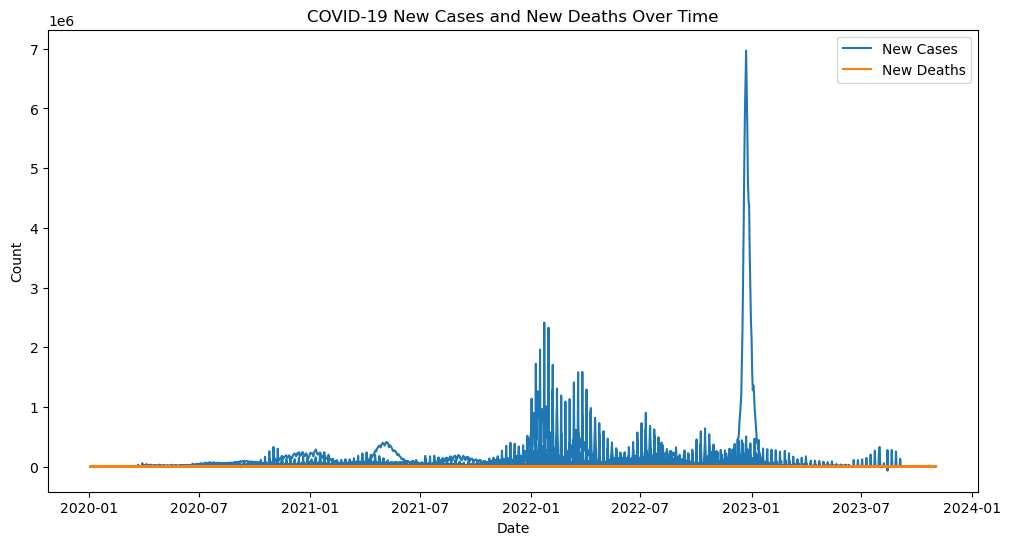

Mean Squared Error: 1764222340.7084038
R^2 Score: 4.287343963338408e-05


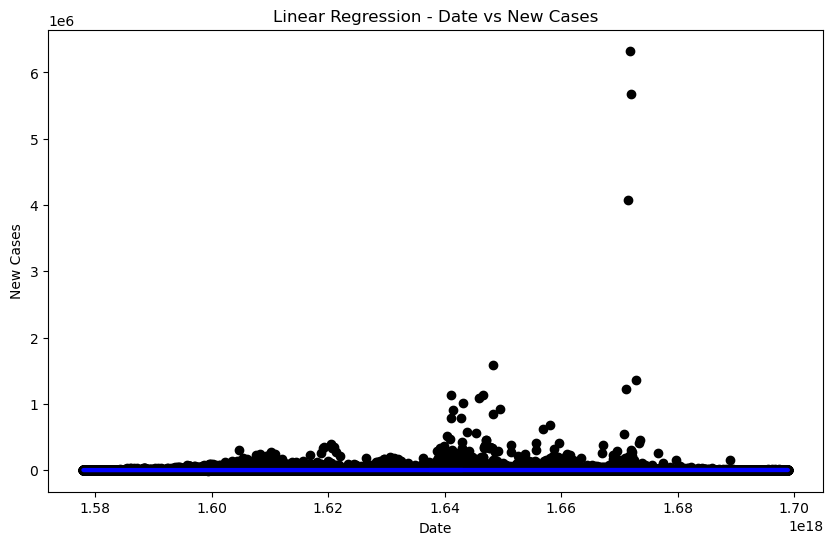

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data from the CSV file
file_path = 'WHO-COVID-19-global-data.csv'
df = pd.read_csv(file_path)

# Convert 'Date_reported' column to datetime format
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

# Overview of the dataset
print(df.info())
print(df.describe())
print(df.head())

# Plotting New cases and New deaths over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date_reported'], df['New_cases'], label='New Cases')
plt.plot(df['Date_reported'], df['New_deaths'], label='New Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 New Cases and New Deaths Over Time')
plt.legend()
plt.show()

# Splitting the data for predictive modeling (example: Linear Regression)
# Considering 'New_cases' as the target variable and 'Date_reported' as a feature
X = df['Date_reported'].values.astype(np.int64)[:, np.newaxis]
y = df['New_cases'].values

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Model evaluation
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Linear Regression - Date vs New Cases')
plt.show()

#Divyal

# K-Means Clustering Analysis

K-Means clustering groups the data points based on their similarity or closeness to each other. For this analysis, we use K-Means clustering on the COVID-19 vaccination data to group countries based on their vaccination progress using selected features.

c:\Users\divyaldesle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\divyaldesle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\divyaldesle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\divyaldesle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows 

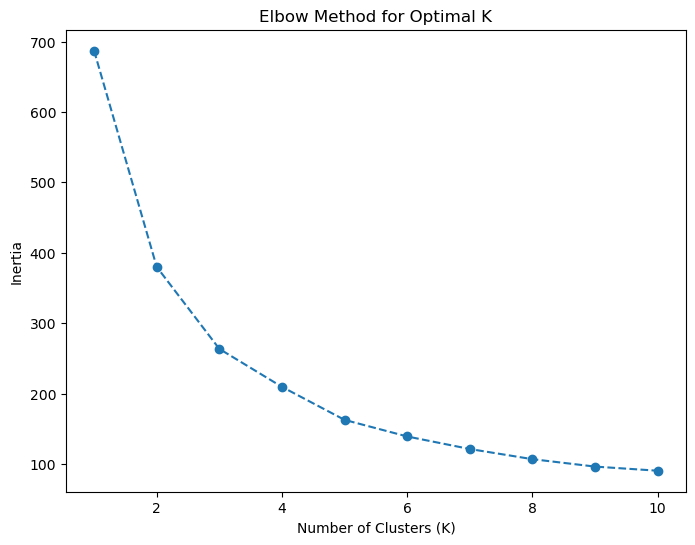

c:\Users\divyaldesle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\divyaldesle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Centers:
[[ 96.12388313   3.4060286   15.18949514]
 [157.75077582   8.96666667  30.88410477]
 [248.52635294   3.88248366  59.24729833]]

Cluster Counts:
0    101
2     68
1     60
Name: Cluster, dtype: int64


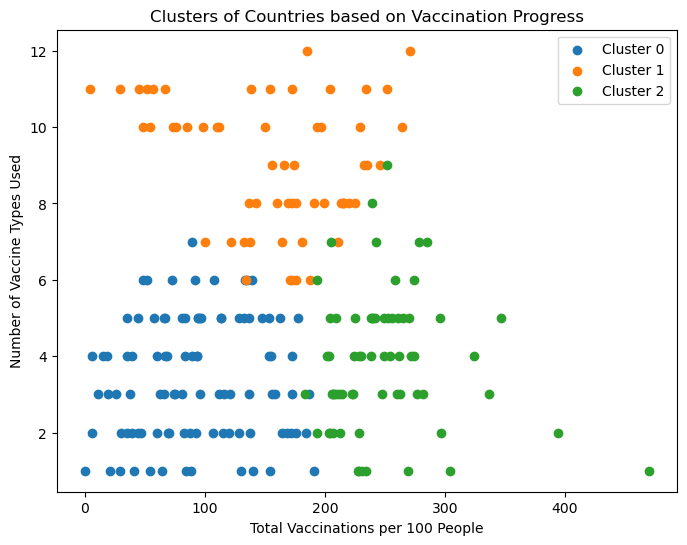

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'vaccination-data.csv'
df = pd.read_csv(file_path)

# Selecting features for clustering
features = ['TOTAL_VACCINATIONS_PER100', 'NUMBER_VACCINES_TYPES_USED', 'PERSONS_BOOSTER_ADD_DOSE_PER100']
X = df[features]

# Handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed
X_imputed = imputer.fit_transform(X)

# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method to visualize the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Perform K-Means clustering with the optimal number of clusters
k = 3  # You can change this number based on the Elbow Method visualization
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Displaying cluster information
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Analyzing the clusters
cluster_counts = df['Cluster'].value_counts()
print("\nCluster Counts:")
print(cluster_counts)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['TOTAL_VACCINATIONS_PER100'], cluster_data['NUMBER_VACCINES_TYPES_USED'],
                label=f'Cluster {i}')
plt.xlabel('Total Vaccinations per 100 People')
plt.ylabel('Number of Vaccine Types Used')
plt.title('Clusters of Countries based on Vaccination Progress')
plt.legend()
plt.show()

#Ananya


## Part 5: Results

In summary, this data science project extensively explored the complexities of the global COVID-19 pandemic. Using advanced analytical techniques such as predictive modeling, machine learning, the study uncovered detailed epidemiological insights and trends. By delving into the data and conducting statistical analyses, we pinpointed key factors influencing transmission rates, identified hotspots, and assessed the severity of COVID-19. This effort shows the significance of data-driven methodologies in improving our ability to comprehend and effectively respond to the challenges posed by infectious diseases. Covid infection rates reached a high point in many places while vaccinations were able to have a mitigating factor on it. Throughout this project, we learned a lot about data science, the story you can tell with it, and the overall effects it can have on the world. In the future, we hope to do more work like this in the hopes of one day being able to make an impact.